# COM6033 Project Assignment

Problem statement: In this project I will predict house prices in Ames, lowa (USA) based on various features such as lot size, neighbourhood, house type and more.
I will compare and create a regression models (Linear Regression and Random Forest) that predicts house prices accurately, minimising  mean squared errors (MSE), Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).

The Ames Iowa Housing dataset is a good choice because it offers many features related to home characteristics, making it suitable for building a predictive model for home prices. Unlike pre-processed datasets, this dataset provides raw data, allowing me to demonstrate a complete understanding of data pre-processing, including handling missing values, normalisation and feature engineering. Although the folder contains four files, including target, test and train to make house price predictions, I decided not to use them as it would make the task easier and the whole process quicker. The idea is to learn how to manipulate the data and use the existing knowledge in the raw data and process the data myself.


Additionally, the size of the dataset allows for efficient analysis and modelling, while providing enough complexity to explore advanced machine learning concepts. Its well-documented structure and relevance to real-world applications make it an excellent tool for learning and demonstrating skills in regression analysis, data cleaning and model implementation.

https://www.kaggle.com/datasets/marcopale/housing?select=train.csv

The first step is to import necessary library, load the dataset and review all the information about the dataset

In [1]:
#import the necessary library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
# load the dataset
df = pd.read_csv('/Users/dawidfroncisz/Desktop/COM6033_Project_Assignment/AmesHousing.csv')

In [3]:
#display information about dataset
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
#Use shape attribute to check the raws (samples) and columns (features)
df.shape

(2930, 82)

In [5]:
#check the type of each variable (data type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

I see many objects that need to be converted to numerical values.

In [6]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


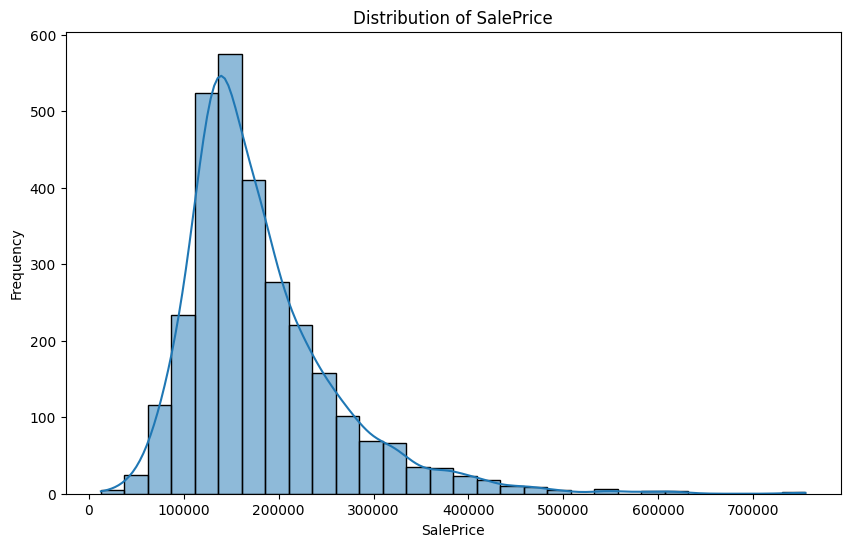

In [7]:
# distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

The histogram with KDE (Kernel Density Estimate) overlay shows the distribution of house sale prices in the dataset. The distribution is right-skewed, indicating that most homes are priced in the $150,000 to $200,000 range, with fewer homes in the higher price ranges. The long tail on the right reflects some high-value outliers, suggesting a small number of very expensive properties. This skewness highlights the need to handle outliers carefully during pre-processing and potential transformations to normalise the data for modelling purposes.

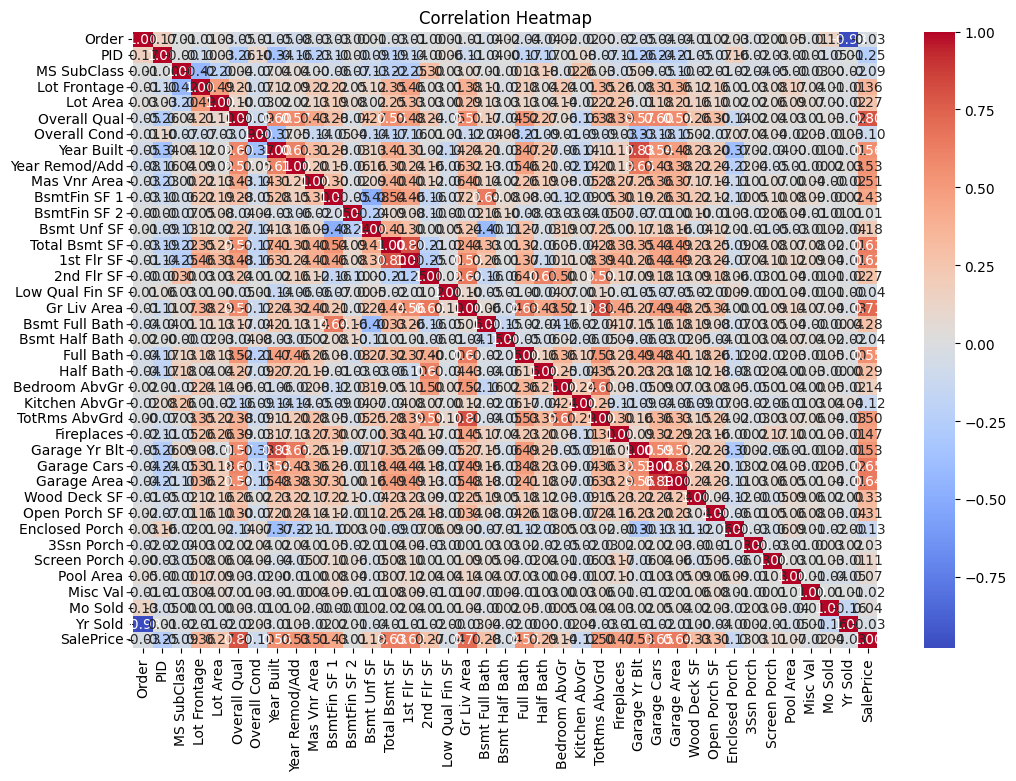

In [8]:
# correlation heatmap for numerical features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap highlights relationships between numerical features in the dataset. Key features, such as Overall Qual, Gr Liv Area, and Garage Area, show strong positive correlations with SalePrice, indicating their importance in predicting house prices. Some features like Mo Sold and Yr Sold show little to no correlation with SalePrice, they may not significantly influence house price.

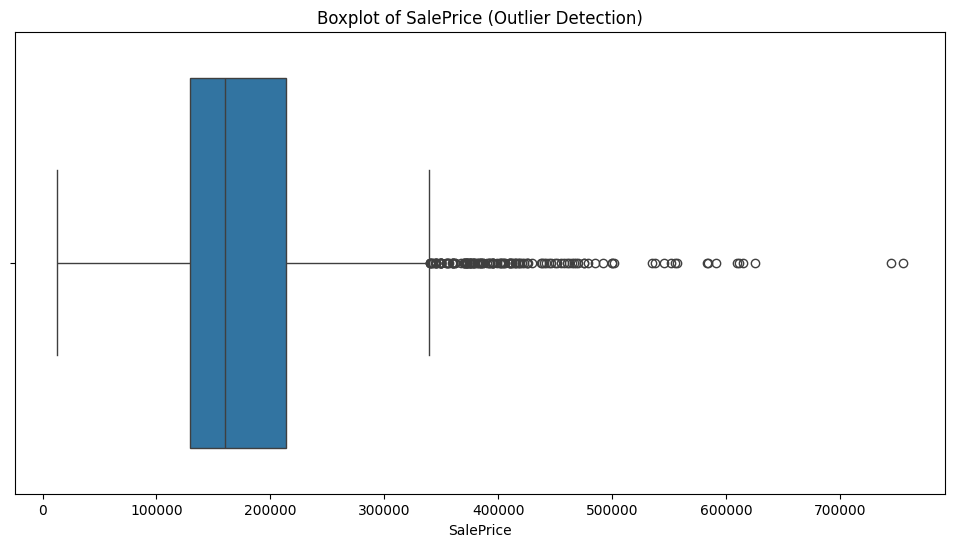

In [9]:
# boxplot to Identify Outliers in SalePrice
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['SalePrice'])
plt.title("Boxplot of SalePrice (Outlier Detection)")
plt.show()

The boxplot of SalePrice highlights the distribution and presence of outliers. Most house prices fall between $100,000 and $300,000, with a median price near $200,000. However, the plot reveals a substantial number of outliers, particularly above $300,000, including extreme cases exceeding $700,000.

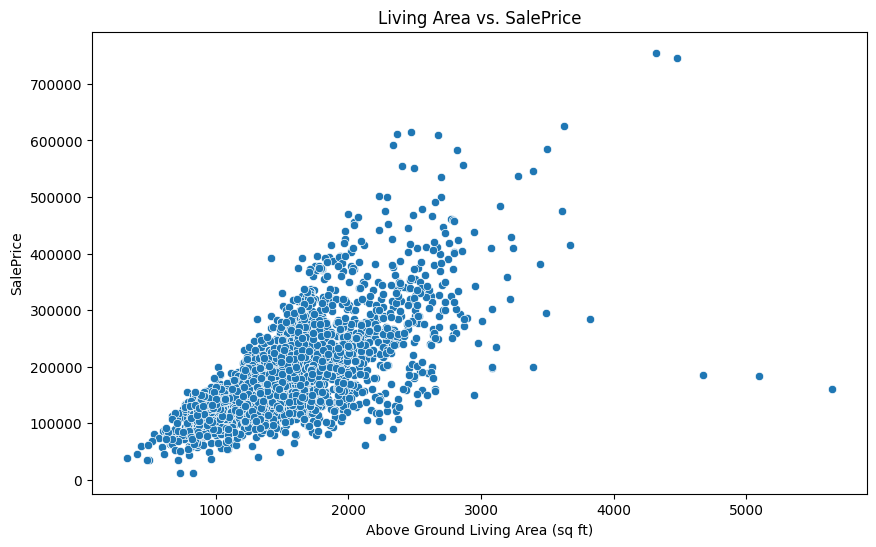

In [10]:
# scatterplots for key relationships
# Living Area vs. SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.title("Living Area vs. SalePrice")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("SalePrice")
plt.show()

The scatter plot highlights the relationship between Above Ground Living Area (sq ft) and SalePrice. A strong positive correlation is observed, with larger living areas generally corresponding to higher sale prices. Most homes are clustered between 1,000–3,000 sq ft and $100,000–$300,000, with a few notable outliers. The flattening trend for larger homes suggests non-linear effects, supporting the use of models like Random Forest that can capture such complexities.

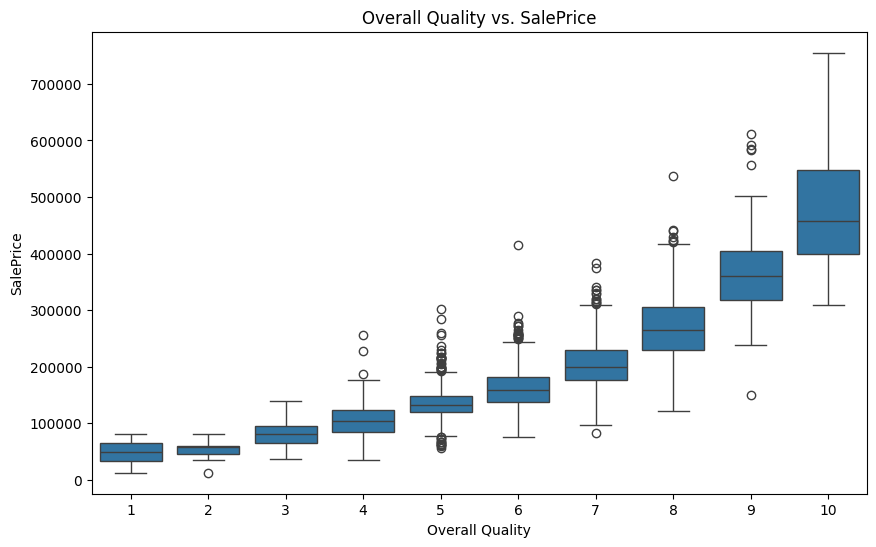

In [16]:
# Overall Quality vs. SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='Overall Qual', y='SalePrice', data=df)
plt.title("Overall Quality vs. SalePrice")
plt.xlabel("Overall Quality")
plt.ylabel("SalePrice")
plt.show()

The box plot illustrates the relationship between overall quality and sale price. It shows a positive correlation, with higher quality homes tending to be sold at higher prices. Sales price variability increases with quality, and outliers are more pronounced at higher quality levels. This analysis confirms that overall quality is a strong predictor of house prices and justifies its inclusion in the model.

In [12]:
# outlier detection: Gr Liv Area and SalePrice
outliers = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 300000)]
print("Potential Outliers Based on Living Area and SalePrice:")
print(outliers)

Potential Outliers Based on Living Area and SalePrice:
      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1498   1499  908154235           60        RL         313.0     63887   Pave   
2180   2181  908154195           20        RL         128.0     39290   Pave   
2181   2182  908154205           60        RL         130.0     40094   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC Fence Misc Feature  \
1498   NaN       IR3          Bnk  ...       480      Gd   NaN          NaN   
2180   NaN       IR1          Bnk  ...         0     NaN   NaN         Elev   
2181   NaN       IR1          Bnk  ...         0     NaN   NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
1498        0       1    2008       New         Partial     160000  
2180    17000      10    2007       New         Partial     183850  
2181        0      10    2007       New         Partial     184750  

[3 rows x 82 columns]


In [13]:
# remove outliers
df = df.drop(outliers.index, errors='ignore')
print(f"Dataset Shape After Removing Outliers: {df.shape}")

Dataset Shape After Removing Outliers: (2927, 82)


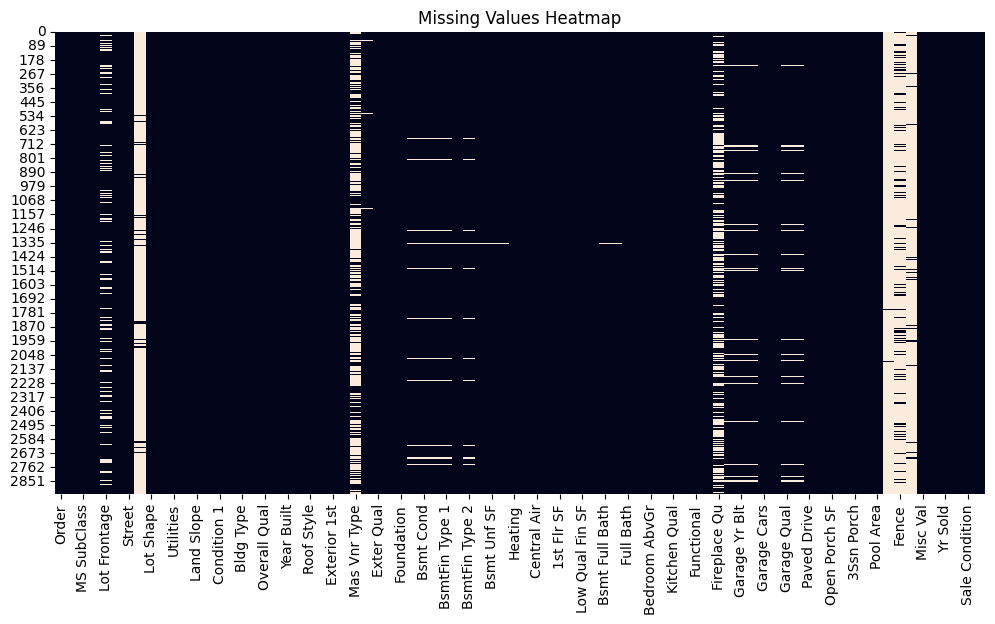

In [14]:
# missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

A heat map of missing values illustrates the distribution of missing data in the dataset. Features such as Pool QC, Misc Feature, Fence and Alley show a high level of missing values (over 80%), making them suitable for removal. Moderate missing values in features such as Lot Frontage, Garage Yr Blt and Fireplace Qu were removed using appropriate imputation strategies such as filling in the median or introducing a ‘No’ category. Features with minimal or no missing data were retained without modification.

I will now categorise the features depending on their datatype (int, float, object) and then calculate the number of them.

In [17]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 43
Integer variables: 28
Float variables: 11


After information provided above I see many categorical variables that need to be converted to int.
To better visualise it I need to identify all objects in column

In [18]:
# list all object (categorical) columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [19]:
# identify missing values only in order
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)


Pool QC           2915
Misc Feature      2822
Alley             2729
Fence             2355
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64

After analysis I see  few potential columns that can be dropped due to high missing values such as Pool QC, Misc Feature, Alley, Fence.
These columns have over 80% missing values.

In [20]:
#delete raws with high percentage of missing values
df = df.drop(
    columns=[
        'Pool QC',
        'Misc Feature',
        'Alley',
        'Fence'
    ]
)

Now it is time to handle remaining missing values focusing first on Categorical Variables.

For example "Mas Vnr Type" filling ‘None’ clearly reflects the lack of this feature, which is important to understand its impact on the price of the property.

Another feature Fireplace Qu indicates houses without fireplace and it make sense to explicitly represent the absence of a fireplace with new category. This avoids misleading the model through arbitrary imputation.

#### Categorical Variables

In [21]:
#fill missin values 
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('No Fireplace')


All garage related variables such as (Garage Cond, Garage Qual, Garage Finish, Garage Type) that can be filled in with "No Garage". This could helps the model to distinguish between houses with and without garages, which can affect the price

In [22]:
#handle missing values
df['Garage Cond'] = df['Garage Cond'].fillna('No Garage')
df['Garage Qual'] = df['Garage Qual'].fillna('No Garage')
df['Garage Finish'] = df['Garage Finish'].fillna('No Garage')
df['Garage Type'] = df['Garage Type'].fillna('No Garage')

Also, here I can follow the same step as above with basement related variables (Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Bsmt Cond, Bsmt Qual) that can filled in with "No Basement".

In [23]:
#fill missin values
df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna('No Basement')
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna('No Basement')
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna('No Basement')
df['Bsmt Cond'] = df['Bsmt Cond'].fillna('No Basement')
df['Bsmt Qual'] = df['Bsmt Qual'].fillna('No Basement')


In this column I am going to fill in the Mode that represents the most common category (SBrkr) making it a safe assumption for missing entries

In [24]:
#handle missing values with mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


Now I need to handle missing values in numerical variables. I decided to use Median because it is robust to outliers and provides a central value for missing data. Also numerical values cannot have a category like "None"

#### Numerical Variables

In [25]:
#fill the missing value with the median
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(df['Mas Vnr Area'].median())


I fill in the remaining variables related to the garage (Garage year, Cars in the garage, Garage area) with the value 0, which corresponds to the categorical handling ("No Garage")

In [26]:
#handle missing values with 0
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)
df['Garage Cars'] = df['Garage Cars'].fillna(0)
df['Garage Area'] = df['Garage Area'].fillna(0)

The same approach with the basement numerical vriables. To avoid writing each line of basement numerical variables I will assign these features to basement_col and fill in with 0

In [27]:
#handle missing value with 0
basement_cols = ['Bsmt Half Bath', 'Bsmt Full Bath', 'BsmtFin SF 1', 
                 'BsmtFin SF 2', 'Total Bsmt SF', 'Bsmt Unf SF']
df[basement_cols] = df[basement_cols].fillna(0)

After completing these steps I will summarise the unique values to verify preprocessing steps

In [28]:
#summarise unique values for all object columns
unique_summary = {col: df[col].unique() for col in df.select_dtypes(include=['object']).columns}

#  summary
for col, unique_vals in unique_summary.items():
    print(f"{col}: {unique_vals}")


MS Zoning: ['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']
Street: ['Pave' 'Grvl']
Lot Shape: ['IR1' 'Reg' 'IR2' 'IR3']
Land Contour: ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities: ['AllPub' 'NoSewr' 'NoSeWa']
Lot Config: ['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']
Land Slope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
Condition 1: ['Norm' 'Feedr' 'PosN' 'RRNe' 'RRAe' 'Artery' 'PosA' 'RRAn' 'RRNn']
Condition 2: ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery' 'RRNn' 'RRAe' 'RRAn']
Bldg Type: ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
House Style: ['1Story' '2Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '1.5Unf' '2.5Fin']
Roof Style: ['Hip' 'Gable' 'Mansard' 'Gambrel' 'Shed' 'Flat']
Roof Matl: ['CompShg' 'WdShake' 'Tar&Grv' 'WdShngl' 'Membran' 'R

After observation categories like "No Garage", "No Fireplace", "No Basement" are correctly added

In this phase I will encode categorical variables to numerical. For unordered categories I will use one-hot encoding while for ordered i will use ordinal encoding.

In [29]:
# one-hot encode nominal variables
nominal_cols = [
    'MS Zoning', 'Street', 'Lot Config', 'Neighborhood', 'Condition 1', 
    'Garage Type', 'Lot Shape', 'Land Contour', 'Utilities', 'Land Slope',
    'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating',
    'Electrical', 'Sale Type', 'Sale Condition', 'BsmtFin Type 1', 'BsmtFin Type 2',
    'Functional', 'Garage Finish'
]
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)


In [30]:
#ordinal encoding for ordered variables
ordinal_mappings = {
    'Exter Cond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Bsmt Cond': {'No Basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Bsmt Exposure': {'No Basement': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'Exter Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Heating QC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Kitchen Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Garage Qual': {'No Garage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Garage Cond': {'No Garage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Bsmt Qual': {'No Basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Fireplace Qu': {'No Fireplace': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Central Air': {'N': 0, 'Y': 1},
    'Paved Drive': {'N': -1, 'P': 0, 'Y': 1}
}
#apply ordinal mappings
for col, mapping in ordinal_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)


Below I will save my ordinal mappings to use later in my flask app.
I want to reproduce the same data transformation, preventing any mismatches between the training data and the live input data keeping consistency

In [31]:
#save the features names mapping 
import json

with open('ordinal_mappings.json', 'w') as f:
    json.dump(ordinal_mappings, f)

In addition I will use mapping of features names for user-friendly UI for Flask app front-end form.
This operation will not affect the model performance.

In [32]:
#mapping of features names
ui_features_names = {
    "Overall Qual": "Overall Quality",
    "Year Built": "Year the House Was Built",
    "Year Remod/Add": "Year the House Was Remodeled",
    "Mas Vnr Area": "Masonry Veneer Area (sq ft)",
    "Exter Qual": "Exterior Quality",
    "Bsmt Qual": "Basement Quality",
    "BsmtFin SF 1": "Finished Basement Area 1 (sq ft)",
    "Total Bsmt SF": "Total Basement Area (sq ft)",
    "Heating QC": "Heating Quality",
    "1st Flr SF": "1st Floor Area (sq ft)",
    "Gr Liv Area": "Above Ground Living Area (sq ft)",
    "Kitchen Qual": "Kitchen Quality",
    "TotRms AbvGrd": "Total Rooms Above Ground",
    "Fireplaces": "Number of Fireplaces",
    "Fireplace Qu": "Fireplace Quality",
    "Garage Cars": "Garage Capacity (Number of Cars)",
    "Garage Area": "Garage Area (sq ft)",
    "Foundation_PConc": "Has Poured Concrete Foundation",
    "BsmtFin Type 1_GLQ": "Finished Basement Type 1 (GLQ - Good Living Quarters)",
    "Total Bathrooms": "Total Bathrooms"
}

After this step I will save the features names mapping for flask app

In [33]:
#save the features names mapping 

with open('ui_features_names.json', 'w') as f:
    json.dump(ui_features_names, f)

I will use feature engineering to enhance the model by creating additional features and combining them into one.

In [34]:
#feature engineering
df['Total Bathrooms'] = (df['Full Bath'] + df['Half Bath']*0.5 +
                         df['Bsmt Full Bath'] + df['Bsmt Half Bath']*0.5)

In [35]:
#combine features into one
df['Total Porch SF'] = (df['Open Porch SF'] + df['Enclosed Porch'] +
                        df['3Ssn Porch'] + df['Screen Porch'])

In [36]:
# drop original columns
df = df.drop(columns=['Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath',
                      'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch'])

In [37]:
print("Remaining Object Columns:", df.select_dtypes(include=['object']).columns)
print("Dataset Shape After Encoding:", df.shape)

Remaining Object Columns: Index([], dtype='object')
Dataset Shape After Encoding: (2927, 221)


After this step I will convert numerical columns to smaller data types (int32 or float32) reducing memory usage and. I also intend to scale numerical data to ensure they are on a similiar range, which can helps in training the model especially in linear regression since scaling is not needed in case of random forest but scaling the data globally will not affect its performance. In this project I am comparing two models therefore I will use scaling.

Before scaling numerical data it is important to seperate the scaling of SalePrice from the other numerical columns. This ensures SalePrice is handled with its own scaler (sale_price_scaler) for proper scaling and back transformation for predictions later.

In [38]:
# save the original SalePrice for back-transformation
original_sale_price = df['SalePrice'].copy()
#convert SalePrice to float64 for scaling
df['SalePrice'] = df['SalePrice'].astype('float64')
#init a scaler
sale_price_scaler = StandardScaler()
df['SalePrice'] = sale_price_scaler.fit_transform(df[['SalePrice']])

In [39]:
#scale other numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('SalePrice', errors='ignore')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [40]:
#optimise remaining numerical data types
int_cols = df.select_dtypes(include=['int']).columns.drop('SalePrice', errors='ignore')
float_cols = df.select_dtypes(include=['float']).columns
df[int_cols] = df[int_cols].astype('int32')
df[float_cols] = df[float_cols].astype('float32')

#### Splitting the data

In [41]:
#split the data
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
#check for NaN values in X_train and y_train
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())

#check for infinite values in X_train
print("Infinite values in X_train:", (X_train == float('inf')).sum().sum())
print("Infinite values in y_train:", (y_train == float('inf')).sum())


Missing values in X_train: 0
Missing values in y_train: 0
Infinite values in X_train: 0
Infinite values in y_train: 0


I need to check for constant features because if a feature has the same value for all samples (0 or 1) the standard deviation for that featurebecomes zero, which cause a division by zero in the correlation calculation

In [43]:
# check for constant features
constant_features = X_train.columns[X_train.nunique() <= 1]
print(f"Constant features: {constant_features.tolist()}")

Constant features: ['Exterior 2nd_Other']


In this case I need to remove them from X_train and X_test

In [44]:
# Drop constant feature from X_train and X_test
X_train = X_train.drop(columns=constant_features)
X_test = X_test.drop(columns=constant_features)

print(f"Shape of X_train after dropping constant features: {X_train.shape}")
print(f"Shape of X_test after dropping constant features: {X_test.shape}")


Shape of X_train after dropping constant features: (2341, 219)
Shape of X_test after dropping constant features: (586, 219)


Due to the large number of features in my dataset I will use SelectKBest method to reduce dimensionality. This method helps with the model performance by reducing overfitting and eliminating irrelevant features. I will select only the top k features (20). In addition, SelectKBest helps identify which features are most important for predicting house prices.

In [45]:
#initialise the SelectKBest feature selector with the f_regression scoring function
selector = SelectKBest(score_func=f_regression, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Exter Qual', 'Bsmt Qual', 'BsmtFin SF 1', 'Total Bsmt SF',
       'Heating QC', '1st Flr SF', 'Gr Liv Area', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces', 'Fireplace Qu', 'Garage Cars',
       'Garage Area', 'Foundation_PConc', 'BsmtFin Type 1_GLQ',
       'Total Bathrooms'],
      dtype='object')


Once the SelectKBest method is initialised I need to save it as a json file to ensure that the flask app knows which features have been selected and loads them to dynamically generate the input form and process user input.

In [46]:
# save the selected feature names

with open('selected_features.json', 'w') as f:
    json.dump(list(selected_features), f)

In [47]:
selected_data_path = 'selected_features_data.csv'
X_selected = X_train[selected_features]
X_selected.to_csv(selected_data_path, index=False)

After selecting the most important features I will begin model evaluation to compare two models, Linear Regression and Random Forest.

In [48]:
# filter training and testing datasets to selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]


In [49]:
#define and fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train[selected_features], y_train)
y_pred_lr = lr_model.predict(X_test[selected_features])


In [50]:
# calculate metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr}")
print(f"Linear Regression - Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"Linear Regression - Mean Absolute Error (MAE): {mae_lr}")
print(f"Linear Regression - R² Score: {r2_lr}")
print("-" * 50)

Linear Regression - Mean Squared Error (MSE): 0.15087190925324925
Linear Regression - Root Mean Squared Error (RMSE): 0.38842233361799533
Linear Regression - Mean Absolute Error (MAE): 0.25302698228670784
Linear Regression - R² Score: 0.8804528815481762
--------------------------------------------------


In [51]:
# define and fit the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train[selected_features], y_train)
y_pred_rf = rf_model.predict(X_test[selected_features])


In [52]:
# calculate metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - R² Score: {r2_rf}")
print("-" * 50)

Random Forest - Mean Squared Error (MSE): 0.09274658296761057
Random Forest - Root Mean Squared Error (RMSE): 0.30454323661445937
Random Forest - Mean Absolute Error (MAE): 0.20415685339530282
Random Forest - R² Score: 0.9265099328635158
--------------------------------------------------


Comparing both models I see that the Random Forest has a lower MSE, RMSE and MAE, indicating that it makes more accurate predictions than Linear regression and predictions are closer to the actual values on average. 
The R² scroe for Random Forest is higher, meaning that it explains more variation in the target variable (SalePrice) compared to Linear Regression.
Moreover, Random Forest being a nonlinear model, is more effective at capturing complex dependencies, which translates into better performance, especially for datasets containing non-linear patterns.

To better compare and visualise both model's performance metrics I will use bar chart with Cross-Validation to ensure the model's robustness and reduce overfitting risks.

In [53]:
#store test RMSE results
results_df = pd.DataFrame({
    "Test RMSE": [rmse_lr, rmse_rf]
}, index=["Linear Regression", "Random Forest"])

In [54]:
# cross-validatin for both models
cv_results = {}
models = {"Linear Regression": lr_model, "Random Forest": rf_model}

for name, model in models.items():
    # perform 5-fold cross-validation splitting training data into 5 parts and using each part as a test set once
    cv_scores = cross_val_score(model, X_train[selected_features], y_train, cv=5, scoring='neg_mean_squared_error')
    # convert negative MSE to RMSE
    cv_rmse = np.sqrt(-cv_scores)
    cv_results[name] = {"Mean RMSE": cv_rmse.mean(), "Standard Deviation": cv_rmse.std()}

In [55]:
# convert cross-validation results to DataFrame
cv_results_df = pd.DataFrame(cv_results).T

In [56]:
# add original Test RMSE to the DataFrame
cv_results_df["Test RMSE"] = results_df["Test RMSE"]

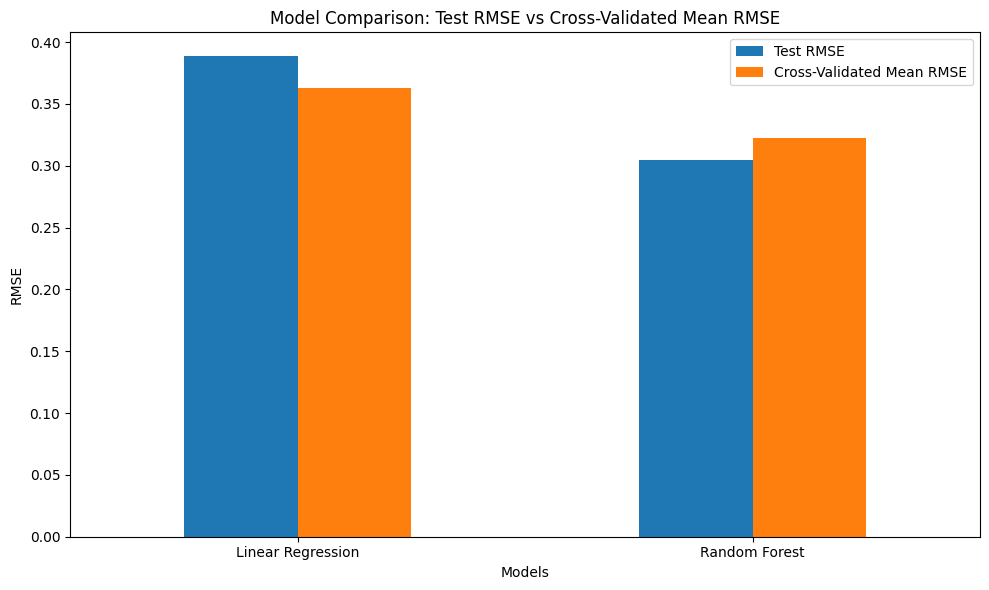

In [57]:
# plot comparison bar chart
cv_results_df[["Test RMSE", "Mean RMSE"]].plot(kind="bar", figsize=(10, 6), rot=0)
plt.title("Model Comparison: Test RMSE vs Cross-Validated Mean RMSE")
plt.ylabel("RMSE")
plt.xlabel("Models")
plt.legend(["Test RMSE", "Cross-Validated Mean RMSE"])
plt.tight_layout()
plt.show()

In [58]:
#display cross-validation results
cv_results_df

,Mean RMSE,Standard Deviation,Test RMSE
Linear Regression,0.362963,0.018485,0.388422
Random Forest,0.322307,0.014586,0.304543


The chart above compares Test RMSE with Cross-Validated Mean RMSE for both models.
I can see that Random Forest has a lower RMSE in both test and cross-validation scenarios, confirming its better predictive performance. The small standard deviations in cross-validation indicate stable performance across all folds. This visualisation effectively highlights the consistency and accuracy of Random Forest.

In the following visualisation I will show the scatterplot for both models

In [59]:
#predictions
y_pred_lr = lr_model.predict(X_test[selected_features])
y_pred_rf = rf_model.predict(X_test[selected_features])

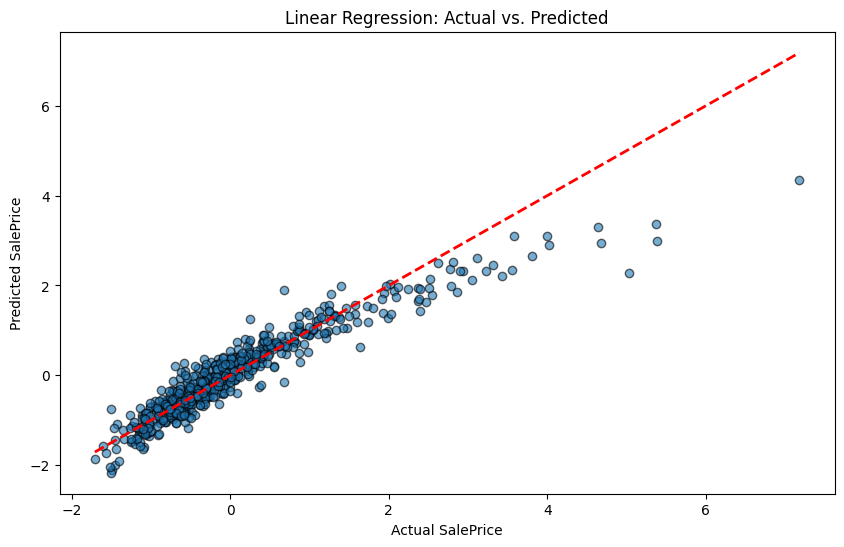

In [60]:
# Scatterplot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Linear Regression: Actual vs. Predicted")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.show()

The above scatterplots for Linear Regression shows most points closely aligned with the red dashed line, indicating good predictive performance. However the predictions deviate more significantly from the red line for higher actual sales price values (above 3), showing that the model has problems with more expensive homes. The spread of points around the red line increases as SalePrice increases, indicating potential heteroscedasticity (non-constant error variance). It is suitable for simpler, linear relationships and works well for mid-range SalePrice values.

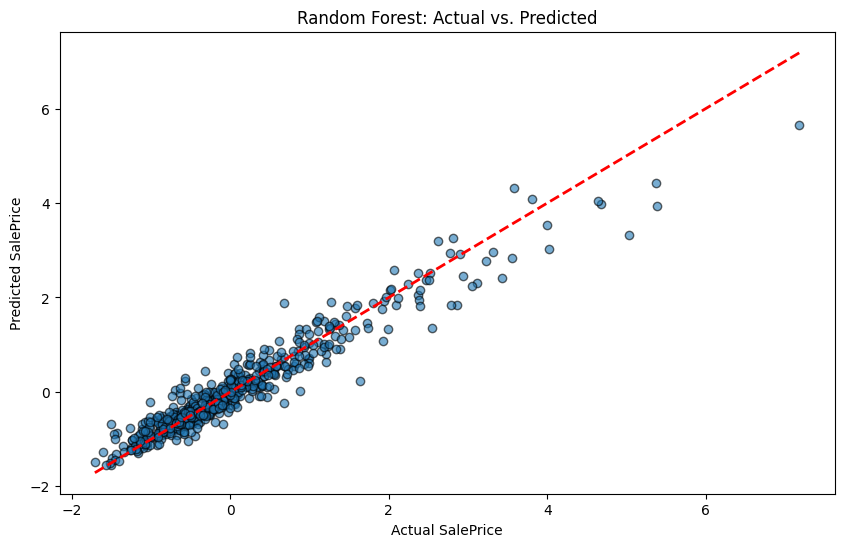

In [61]:
# Scatterplot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Random Forest: Actual vs. Predicted")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.show()

The red dashed line represents the ideal scenario where the predicted values perfectly match the actual value. From my observations it follows that most points are closely aligned with the red line, indicating that the random forest model performs quite well in predicting house prices. Some points deviate from the red line, especially for higher values of Actual SalePrice. This suggest that model has more difficulty predicting more expensive homes, which is common in regressions due to outliers or model limitations. However, when comparing both models, there is a significant difference in which the random forest model performs much better at higher prices than linear regression. It is suitable for capturing complex, non-linear relationships and is better suited for datasets that have variability across the SalePrice range.

Also, I will show residuals plot which is a graphical representation of the residuals (errors) of a regression model. Residuals are the differences between the actual values of the dependent variable (target) and the values predicted by the model.

In [62]:
#residuals for Linear Regression
residuals_lr = y_test - y_pred_lr

In [63]:
#residuals for Random Forest
residuals_rf = y_test - y_pred_rf

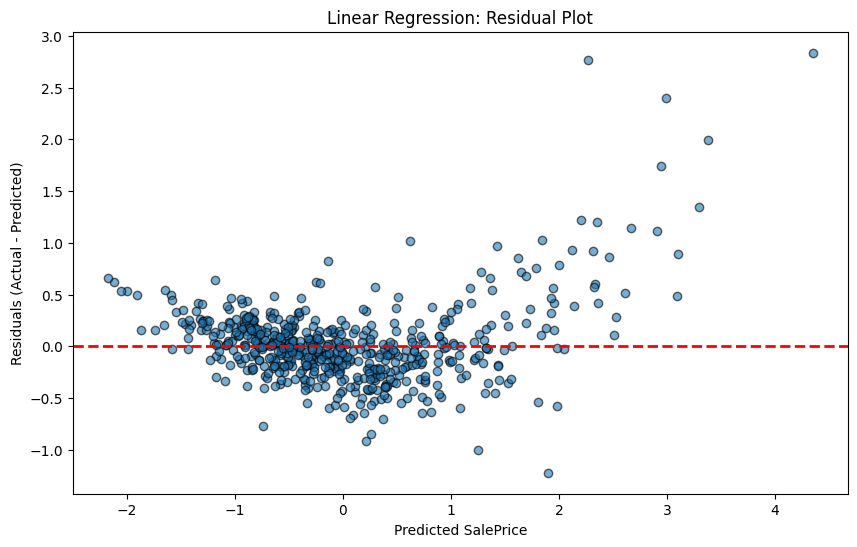

In [64]:
# residual Plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, residuals_lr, alpha=0.6, edgecolors='k')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title("Linear Regression: Residual Plot")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

This model performs well for predicted SalePrice values in the mid-range, but struggles for higher prices, leading to larger error variance and outliers. For lower predicted values (around -2 to 1), residuals are tightly clustered, but for higher predicted values (above 2), residuals become more spread out and deviate significantly from the red line. This siggests heteroscedasticity, where the model's prediction error grows with higher SalePrice values.

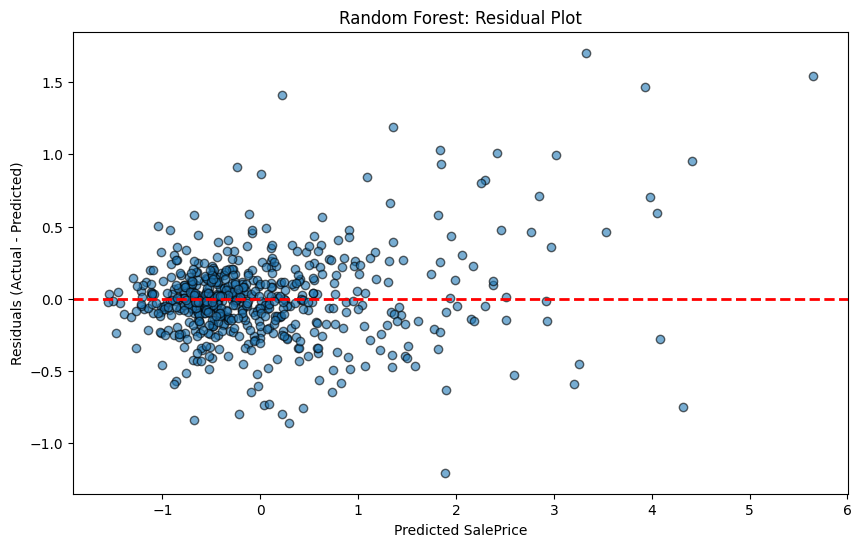

In [65]:
# Residual Plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.6, edgecolors='k')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title("Random Forest: Residual Plot")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

The residuals (Actual - Predicted) are mostly centred around the horizontal red dashed line which shows that the random forest model has no systematic bias, it does not consistently over or underestimate the selling price. However there are several residuals far from 0 indicating the presence of outliers or extreme predictions. The residuals for the lower and medium values of the predicted selling price (around -1 to 2) are more concentrated, suggesting that the model performs better in these cases.

Now it is time to compare the actual price with the predicted price of both models

In [66]:
comparison_scaled = pd.DataFrame({
    'Actual Price (Scaled)': y_test.values,
    'Predicted Price (Linear Regression - Scaled)': y_pred_lr,
    'Predicted Price (Random Forest - Scaled)': y_pred_rf
})

# Print a few rows of the scaled comparison
print("Comparison Before Back-Transform (Scaled Values):")
comparison_scaled.head()


Comparison Before Back-Transform (Scaled Values):


,Actual Price (Scaled),Predicted Price (Linear Regression - Scaled),Predicted Price (Random Forest - Scaled)
0,1.469538,1.060917,1.817893
1,-0.610674,-0.383468,-0.539790
2,0.033777,-0.092201,0.080163
3,0.220780,0.094726,0.112440
4,0.865932,1.317951,1.340980


In the above comparison, we observe the scaled prices for both models (Linear Regression and Random Forest). While this scaled comparison is useful for evaluating the models during the data preprocessing phase (especially for Linear Regression), in real-world applications, it is necessary to back-transform these values to their original scale to interpret the actual and predicted house prices meaningfully.

In [67]:
# back-transform predictions (new)
y_test_original = sale_price_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()
y_pred_lr_original = sale_price_scaler.inverse_transform(y_pred_lr.reshape(-1, 1)).flatten()
y_pred_rf_original = sale_price_scaler.inverse_transform(y_pred_rf.reshape(-1, 1)).flatten()

# create comparison DataFrame (new)
comparison_df = pd.DataFrame({
    'Actual Price (Original Scale)': y_test_original,
    'Predicted Price (Linear Regression)': y_pred_lr_original,
    'Predicted Price (Random Forest)': y_pred_rf_original
})

comparison_df.head()

,Actual Price (Original Scale),Predicted Price (Linear Regression),Predicted Price (Random Forest)
0,298236.0,265581.859880,326074.068736
1,132000.0,150156.687634,137664.500067
2,183500.0,173432.700735,187206.850088
3,198444.0,188370.596837,189786.200081
4,250000.0,286122.227806,287962.500958


After thorough analysis I decided to use Random Forest model due to better performance and more accurate predictions and will save sale price scaler for use in the flask app.

In [63]:
#export the trained Random Forest model
from joblib import dump

model_path = 'random_forest_model.joblib'
dump(rf_model, model_path)

['random_forest_model.joblib']

In [64]:
dump(sale_price_scaler, 'sale_price_scaler.joblib')

['sale_price_scaler.joblib']

### Project Design

The project consists of several steps, including:

* Defined the problem
* Data Collection
* Data Preprocessing
* * Handled missing values
* * Removed features
* * Applied scaling to numerical features for Linear Regression and selected the top features
using SelectKBest
* Feature Engineering
* * Created new features
* * Encoded categorical variables using one-hot and ordinal encoding
* Model Comparison
* * Evaluated two regression models using metrics like MSE, RMSE, MAE and R², supported by cross validation
* * Used visualisations (scatterplots, residual plots) to diagnose model performance and limitations
* Deployment Preparation
* * Saved model and data transformation mappings for consistent intehration into Flask app

### Challenges Encountered and Improvements for Future Work

I encountered many problems during the project, but I will focus on the most important ones that caused me the most difficulties. I chose a dataset that was quite demanding for the first time, which I just realised due to the many missing values among features. In addition, the dataset contained many features which could lead to model overfitting, so I decided to use SelectKBest to identify the top 20 features, ensuring dimensionality reduction without significant loss of information. Initially, I considered only one model (Linear Regression) but failed to capture non-linear relationships. Therefore, I had to add another model, Random Forest, that handled complexity better. I wanted to improve the performance of my linear regression model by scaling numerical values. However, this caused me some problems at the end of the project when predicting house prices. Thus, I had to use a back-transform method to show the original scale of the house prices. In the end, I had deployment challenges. I wanted to ensure the Flask app dynamically processed user input while maintaining consistency with the training data. I found a solution to that problem, saving ordinal mappings and selected features as a JSON file to facilitate consistent preprocessing in deployment.

My time management will definitely improve for future work. Because this was my first machine learning project, I had many complications, as described above, resulting in a more significant challenge and time to complete. Furthermore, I would like to add more advanced models such as XGBoost or LightGBM and enhance the Flask app with more user-friendly features such as adding some visualisation feedback and Improving performance for predicting high-value houses by addressing outliers. In summary, I am pleased with the successful completion of this project. It may not be the best model, but considering that it was my first project of this type, I evaluate it positively. I have learned a lot of new skills that I will be able to use in the future.